In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [79]:
import numpy as np
import math

import time
import itertools as itertools

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm

# Exercise 4-2

In [71]:
def isprime(n):
    """Returns True if n is prime."""
    if n == 2:
        return True
    if n == 3:
        return True
    if n % 2 == 0:
        return False
    if n % 3 == 0:
        return False

    i = 5
    w = 2

    while i * i <= n:
        if n % i == 0:
            return False

        i += w
        w = 6 - w

    return True

def iseven(n):
    """Returns True if n is even."""
    if n % 2 == 0:
        return True
    else:
        return False

In [3]:
iterations = 1000
k_start = 100
k_end = 1001

k = {}
v = {}
d = {}

for i in range (k_start,k_end):
    k["k" + str(i)] = i
    v["v" + str(i)] = i
    tt = 0

    for j in range (1,iterations):
        random_vals = np.random.rand(v["v" + str(i)])
        
        t = time.time()
        np.fft.fft(random_vals)
        t2 = time.time() - t
        tt = tt + t2
        
    d["d" + str(i)] = tt/iterations

In [72]:
#convert dictionaries to lists to plot
index = list(k.values())
times = list(d.values())
index_prime = []
time_prime = []
index_even = []
time_even = []

for x in index[:]:
    if isprime(x) == True:
        index_prime.append(x)
        time_prime.append(times[x-100])
        
for x in index[:]:
    if iseven(x) == True:
        index_even.append(x)
        time_even.append(times[x-100])


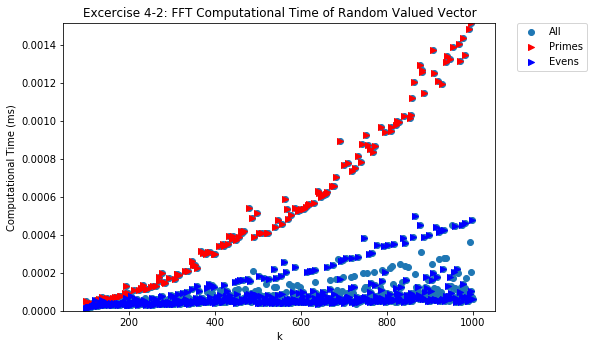

In [78]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

#title axis
ax.set_xlabel('k')
ax.set_ylabel('Computational Time (ms)')
ax.set_title('Excercise 4-2: FFT Computational Time of Random Valued Vector')
ax.set_ylim(0,np.max(times))

ax.scatter(index,times, label = 'All')
ax.scatter(index_prime,time_prime, label = 'Primes', marker = ">", color = "red")
ax.scatter(index_even,time_even, label = 'Evens', marker = ">", color = "blue")

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()